**データへの確率分布の仮定**

乳がん診断データの診断結果 (diagnosis) は
M = malignant (悪性) or B = benign (良性) と2値をとる離散の事象
→ベルヌーイ分布を仮定

https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import beta 

data = pd.read_csv("/input/breast-cancer-wisconsin-data.csv")

#陽性率を求めたいので、B　=　1、M　=　0 に置換
data=data.replace({'diagnosis': {'M': 0}})
data=data.replace({'diagnosis': {'B': 1}})
d1=len(data.query('diagnosis == 1'))
d2=len(data["diagnosis"])
mu_truth=d1/d2

#陽性率の理論値
print(mu_truth)

0.6274165202108963


**モデルの構築・学習**

ベルヌーイ分布のパラメータは$\mu \in(0,1)$を取るので
共役事前分布としてベータ分布を採用

$p(\mu)=\operatorname{Beta}(\mu \mid a, b)$

今回は真のパラメータをもとにしたベルヌーイ分布から発生したデータ系列$X_{n}$を学習させて

パラメータの事後分布を求めたいので以下のベータ分布を求める

$p(\mu \mid X)=\operatorname{Beta}(\mu \mid \hat{a}, \hat{b})$

$\hat{a}=\sum_{n=1}^{N} x_{n}+a$

$\hat{b}=N-\sum_{n=1}^{N} x_{n}+b$

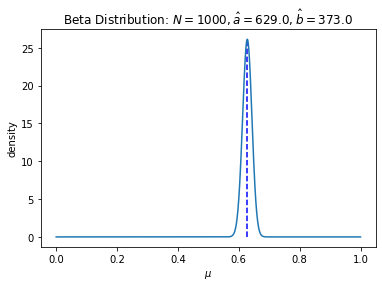

In [24]:
#ランダムサンプリング
N=1000
x_n = np.random.binomial(n=1, p=mu_truth, size=N)

# 事前分布のパラメータを指定
a = 1.0
b = 1.0

# x軸の値を設定
mu_line = np.arange(0.0, 1.001, 0.001) 

# ハイパーパラメータの計算
a_hat = np.sum(x_n) + a 
b_hat = x_n.shape[0] - np.sum(x_n) + b 

# 事後分布の確率密度の計算
posterior = beta.pdf(x=mu_line, a=a_hat, b=b_hat)

# 理論値と事後分布の比較
plt.plot(mu_line, posterior)
plt.vlines(x=mu_truth, ymin=0, ymax=max(posterior), linestyles='--',  color='blue')
plt.xlabel('$\mu$')
plt.ylabel('density')
plt.title('Beta Distribution: $N=' + str(x_n.shape[0]) + ', \hat{a}=' + str(a_hat) + ', \hat{b}=' + str(b_hat) + '$')
plt.show()

**予測分布**

データ観測後の$\mu$の事後分布により学習後の予測分布を得る

$\begin{aligned} p\left(x_{*} \mid \mathbf{X}\right) &=\operatorname{Bern}\left(x_{*} \mid \frac{\hat{a}}{\hat{a}+\hat{b}}\right) \\ &=\operatorname{Bern}\left(x_{*} \mid \frac{\sum_{n=1}^{N} x_{n}+a}{N+a+b}\right) \end{aligned}$

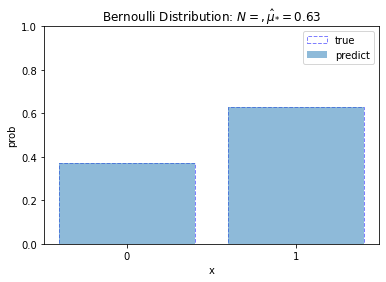

In [25]:
# データ観測後のmuの事後分布により学習後の予測分布を得る
mu_star=a_hat/(a_hat+b_hat)
predict = [1 - mu_star, mu_star]

# 理論値
true_model = np.array([1 - mu_truth, mu_truth]) 

plt.figure()
plt.bar(x=np.array([0, 1]), height=true_model, label='true', alpha=0.5, color='white', edgecolor='blue', linestyle='dashed') 
plt.bar(x=np.array([0, 1]), height=predict, label='predict', alpha=0.5) 
plt.xlabel('x')
plt.ylabel('prob')
plt.xticks(ticks=np.array([0, 1]), labels=np.array([0, 1])) 
plt.title('Bernoulli Distribution: $N='  + ', \hat{\mu}_{*}=' + str(np.round(mu_star, 2)) + '$')
plt.ylim(0.0, 1.0)
plt.legend()
plt.show()